# Visualization of gradient descent and its variants

#### Imports

In [1]:
# To help with visualization

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib notebook

In [2]:
# Gradient descent module 

import gradient_descent as gd

#### Helper Code for visualization

In [3]:
# Helper function to perform gradient descent

def find_local_opt(grad_descent, w_0):
    """
    Performs gradient descent algorithm with the passed instance of a gradient descent class

    Parameters
    ----------
    grad_descent: GradientDescent(or its subclass)
                  gradient descent object which defines the descent process
    w_0: array_like
         initial weight parameter

    Returns
    -------
    out: tuple
         Class instance after performing gradient descent iterations,
         Local minimum found by gradient descent,
         and the value of target function at local minimum
    """
    x_min, f_min, iterations = grad_descent.iterate(w_0)
    return (grad_descent, x_min, f_min, iterations)

In [4]:
# Function to plot sequence of steps in gradient descent on a 1D function

def plot_grad_1d_descent(grad_descent):
    
    def plot2d_func(f, x_min=-10, x_max=10, samples=500):
        x = np.linspace(x_min, x_max, samples)
        ax.plot(x, f(x))
        ax.grid()
    
    def update(frame):
        x = np.array(history[:frame+1])
        y = f(x)

        scatter.set_offsets(np.vstack((x, y)).T)
        if frame > 0:
            s[frame-1] = 50
            s[frame] = 100
            c[frame-1] = 100
            c[frame] = 125
            scatter.set_sizes(s[:frame+1])
            scatter.set_array(c[:frame+1])
        return (scatter,)
    
    def getfiginfo():
        fig, ax = plt.subplots(ncols=1, figsize=(6, 4), tight_layout=True)
        tit = ax.title
        scatter = ax.scatter([], [])
        return fig, ax, tit, scatter
    
    f = grad_descent.f
    history = grad_descent.history
    s = np.full(len(history), 50)
    c = np.full(len(history), 50)
    fig, ax, tit, scatter = getfiginfo()
    fig.suptitle(type(grad_descent).__name__)
    plot2d_func(f)
    anim = FuncAnimation(fig, update, interval=500, repeat=False, frames=range(len(history)), blit=True)
    return anim

In [5]:
# Function to plot sequence of steps in gradient descent on the countour of a 2D function

def plot_grad_2d_descent(grad_descent):
    
    def plot3d_funccontour(f, x_min=0, x_max=1.1, y_min=0.7, y_max=1.8, samples=2500):
        x = np.linspace(x_min, x_max, samples)
        y = np.linspace(y_min, y_max, samples)
        X, Y = np.meshgrid(x, y)
        Z = f((X, Y))
        cs = ax.contour(X, Y, Z)
        ax.clabel(cs, inline=True, fontsize=10, zorder=0)
        ax.set_aspect('equal', adjustable='box')
    
    def update(frame):
        x = np.array(history[:frame+1])
        hx = x[:,0]
        hy = x[:,1]
        # Quiver function set_XY update not yet available
        # github.com/matplotlib/matplotlib/issues/11790
        # so not updating on a single ax.quiver instance line in (ax.scatter)
        ax.quiver(hx[:-1], hy[:-1], hx[1:]-hx[:-1], hy[1:]-hy[:-1], scale_units='xy', angles='xy', scale=1, zorder=5)
        scatter.set_offsets(np.vstack((hx, hy)).T)
        if frame > 0:
            s[frame-1] = 50
            s[frame] = 100
            c[frame-1] = 100
            c[frame] = 125
            scatter.set_sizes(s[:frame+1])
            scatter.set_array(c[:frame+1])
        return (scatter,)
    
    def getfiginfo():
        fig, ax = plt.subplots(ncols=1, figsize=(6, 6), tight_layout=True)
        tit = ax.title
        scatter = ax.scatter([], [], zorder=10)
        # Quiver function set_XY update not yet available
        # github.com/matplotlib/matplotlib/issues/11790
        # so not updating on a single ax.quiver instance line in (ax.scatter)
        # quiver = ax.(...)
        return fig, ax, tit, scatter
    
    f = grad_descent.f
    history = grad_descent.history
    s = np.full(len(history), 50)
    c = np.full(len(history), 50)
    fig, ax, tit, scatter = getfiginfo()
    fig.suptitle(type(grad_descent).__name__)
    plot3d_funccontour(f)
    
    anim = FuncAnimation(fig, update, interval=100, repeat=False, frames=range(len(history)), blit=True)
    return anim

In [6]:
# gif writer

# writer = PillowWriter(fps=1)

#### Test functions

In [7]:
def test_f_1d(w):
    return w**2 - 15*np.sin(np.pi*w/3)

def test_grad_f_1d(w):
    return 2*w - 5*np.pi*np.cos(np.pi*w/3)

def test_f_2d(w):
    return 10*w[0]**2 + w[1]**2 + w[0]*w[1] - 15*np.sin(np.pi/3*w[0])*np.sin(np.pi/3*w[1])

def test_grad_f_2d(w):
    return np.array([
        20*w[0] + w[1] - 5*np.pi*np.cos(np.pi/3*w[0])*np.sin(np.pi/3*w[1]),
        2*w[1] + w[0] - 5*np.pi*np.cos(np.pi/3*w[1])*np.sin(np.pi/3*w[0])
    ])

## Visualizations

### 1D

#### Vanilla Gradient Descent

<IPython.core.display.Javascript object>


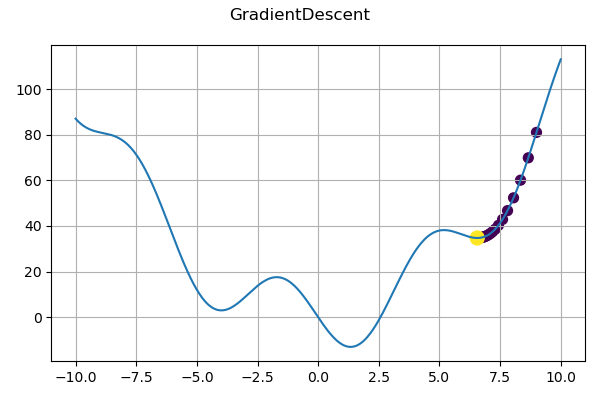

w*=6.557488099873505, f(w*)=34.73267005741556, iterations=63


In [8]:
grad_obj, w_min, f_min, iterations = find_local_opt(gd.GradientDescent(test_f_1d, test_grad_f_1d), 9.0)
animation = plot_grad_1d_descent(grad_obj)
# animation.save(f'{type(grad_obj).__name__}.gif', writer=writer)
print(f'w*={w_min}, f(w*)={f_min}, iterations={iterations}')

It got stuck at a 'bad' local minima, but may be if it had some 'momentum' it could go over the local minima to a 'better' minima!

#### Momentum Gradient Descent

<IPython.core.display.Javascript object>


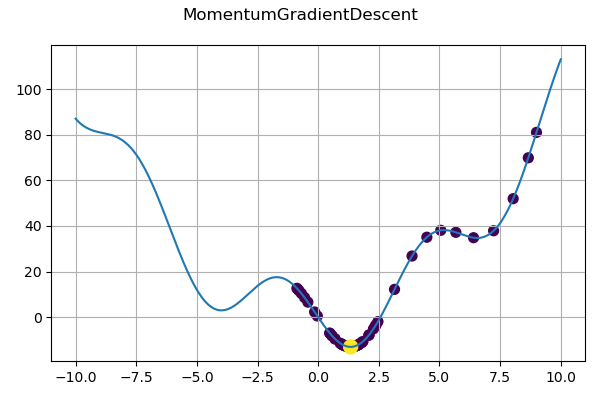

w*=1.3391707710640754, f(w*)=-12.994384380083195, iterations=63


In [9]:
grad_obj, w_min, f_min, iterions = find_local_opt(gd.MomentumGradientDescent(test_f_1d, test_grad_f_1d), 9.0)
animation = plot_grad_1d_descent(grad_obj)
# animation.save(f'{type(grad_obj).__name__}.gif', writer=writer)
print(f'w*={w_min}, f(w*)={f_min}, iterations={iterations}')

It moved to a better minima, but the momentum causes many oscillations moving away from the minima, maybe if it looked 'ahead' it would reduce oscialltions.

#### Nesterov Gradient Descent

<IPython.core.display.Javascript object>


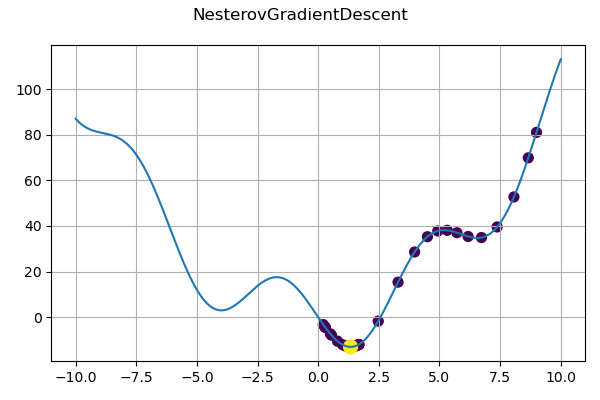

w*=1.3352709600686692, f(w*)=-12.994422530583808, iterations=62


In [10]:
grad_obj, w_min, f_min, iterations = find_local_opt(gd.NesterovGradientDescent(test_f_1d, test_grad_f_1d), 9.0)
animation = plot_grad_1d_descent(grad_obj)
# animation.save(f'{type(grad_obj).__name__}1D.gif', writer=writer)
print(f'w*={w_min}, f(w*)={f_min}, iterations={iterations}')

The number of oscillations about the minima is smaller, but.. the minima obtained is very slightly larger than previous algorithm.
=> more fine tuning might be required for this case

Neverthless, this looks good.. for the 1D case.

### 2D

#### Nesterov Gradient Descent

<IPython.core.display.Javascript object>


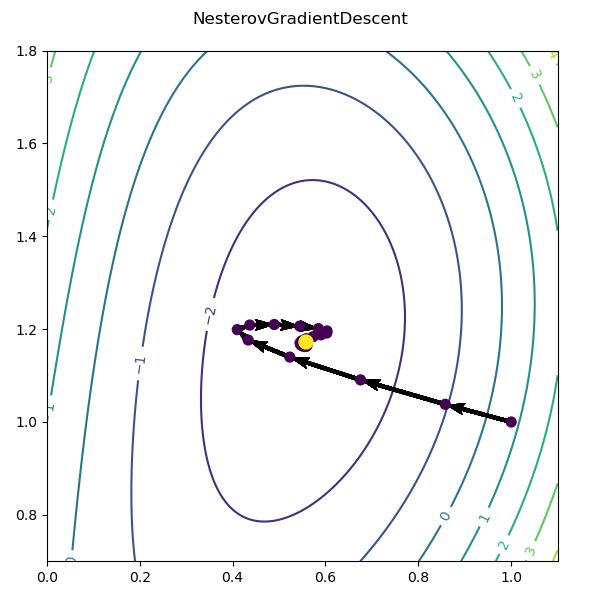

w*=[0.55801613 1.17223635], f(w*)=-2.650151876431355, iterations=40


In [12]:
grad_obj, w_min, f_min, iterations = find_local_opt(gd.NesterovGradientDescent(test_f_2d, test_grad_f_2d), 
                                                    np.array([1, 1]))
animation = plot_grad_2d_descent(grad_obj)
# animation.save(f'{type(grad_obj).__name__}.gif', writer=writer)
print(f'w*={w_min}, f(w*)={f_min}, iterations={iterations}')

It updates the weight along the first dimension faster compared to the second dimension, and thus overshoots along the first dimension resulting in U-turns to move towards minima, maybe if it dampened learning rates of dimensions with faster updates and vice-versa for dimensions with slower updates it would avoid overshoots and move faster to minima.

#### AdaGrad Gradient Descent

<IPython.core.display.Javascript object>


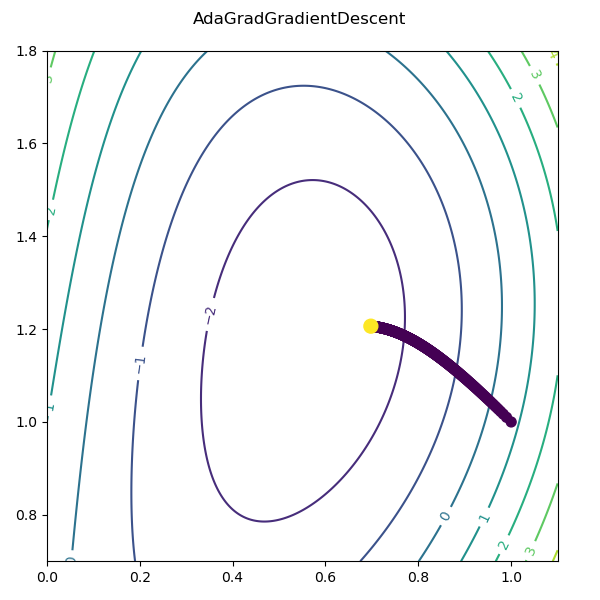

w*=[0.61273183 1.19657327], f(w*)=-2.6090029656827722, iterations=911


In [13]:
grad_obj, w_min, f_min, iterations = find_local_opt(gd.AdaGradGradientDescent(test_f_2d, test_grad_f_2d), 
                                        np.array([1, 1]))
animation = plot_grad_2d_descent(grad_obj)
#animation.save(f'{type(grad_obj).__name__}.gif', writer=writer)
print(f'w*={w_min}, f(w*)={f_min}, iterations={iterations}')

It dampened the updates too much and rate of learning is extremely slow, maybe if it 'forgets' updates in the past, the learning rate would not dimnish too much.

#### RMSProp Gradient Descent

<IPython.core.display.Javascript object>


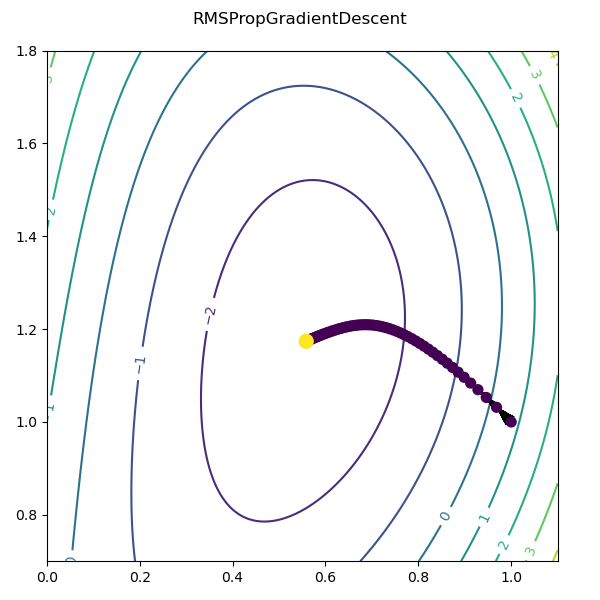

w*=[0.55850601 1.17372137], f(w*)=-2.650162169852358, iterations=74


In [14]:
grad_obj, w_min, f_min, iterations = find_local_opt(gd.RMSPropGradientDescent(test_f_2d, test_grad_f_2d), 
                                        np.array([1, 1]))
animation = plot_grad_2d_descent(grad_obj)
# animation.save(f'{type(grad_obj).__name__}.gif', writer=writer)
print(f'w*={w_min}, f(w*)={f_min}, iterations={iterations}')

It updates the weight faster, maybe if we introduced 'momentum', it would move even more quickly to the minima.

#### Adam Gradient Descent

<IPython.core.display.Javascript object>


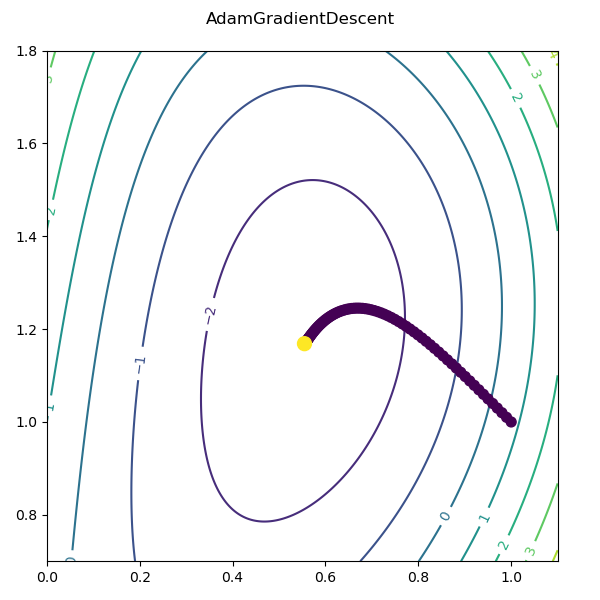

w*=[0.55483051 1.16863033], f(w*)=-2.6499157509864446, iterations=94


In [15]:
grad_obj, w_min, f_min, iterations = find_local_opt(gd.AdamGradientDescent(test_f_2d, test_grad_f_2d), 
                                        np.array([1, 1]))
animation = plot_grad_2d_descent(grad_obj)
# animation.save(f'{type(grad_obj).__name__}.gif', writer=writer)
print(f'w*={w_min}, f(w*)={f_min}, iterations={iterations}')

The idea is nice and this algorithm has profound influence!! 
Neverthless, notice that the obtained local optima (minimum value) is slightly larger than the value obtained by some of the previous algorithms and it does not have the smallest number of iterations 
=> The choice of algorithm AND fine tuning its parameters based on knowledge of function, choice of starting weight decides the actual performance!